In [1]:
# ✅ Importing Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")



In [2]:
data = pd.read_csv("/content/drive/MyDrive/chatgpt_style_reviews_dataset.csv")

In [3]:
d = data.copy()

In [4]:
d.shape

(500, 12)

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               500 non-null    object
 1   title              500 non-null    object
 2   review             500 non-null    object
 3   rating             500 non-null    int64 
 4   username           500 non-null    object
 5   helpful_votes      500 non-null    int64 
 6   review_length      500 non-null    int64 
 7   platform           500 non-null    object
 8   language           500 non-null    object
 9   location           500 non-null    object
 10  version            500 non-null    object
 11  verified_purchase  500 non-null    object
dtypes: int64(3), object(9)
memory usage: 47.0+ KB


In [6]:
d.isnull().sum()

,0
date,0
title,0
review,0
rating,0
username,0
helpful_votes,0
review_length,0
platform,0
language,0
location,0


In [7]:
d.describe()

,rating,helpful_votes,review_length
count,500.000000,500.000000,500.000000
mean,3.012000,103.090000,6.934000
std,1.366598,57.747896,1.453916
min,1.000000,0.000000,5.000000
25%,2.000000,55.750000,6.000000
50%,3.000000,104.500000,7.000000
75%,4.000000,152.000000,8.000000
max,5.000000,200.000000,10.000000


In [8]:
d.describe(include = "object")

,date,title,review,username,platform,language,location,version,verified_purchase
count,500,500,500,500,500,500,500,500,500
unique,88,500,15,500,5,9,10,5,2
top,########,Review title 500,"Highly satisfied, the app works exactly as exp...",user500,Flipkart,fr,Kenya,4.2.1,No
freq,358,1,50,1,113,68,60,113,262


In [9]:
d["verified_purchase"].value_counts()

,count
verified_purchase,
No,262
Yes,238


In [10]:
d[d["verified_purchase"]== "No"].groupby("rating").size().reset_index(name = "Count")

,rating,Count
0,1,44
1,2,62
2,3,51
3,4,55
4,5,50


In [11]:
d.duplicated().sum()

np.int64(0)

In [12]:
d.date.value_counts()

,count
date,
########,358
03-07-2024,4
03-02-2024,4
02-01-2025,4
02-03-2024,4
...,...
07-07-2024,1
03-03-2024,1
03-06-2025,1


# ***EXPLORATORY DATA ANALYSIS***

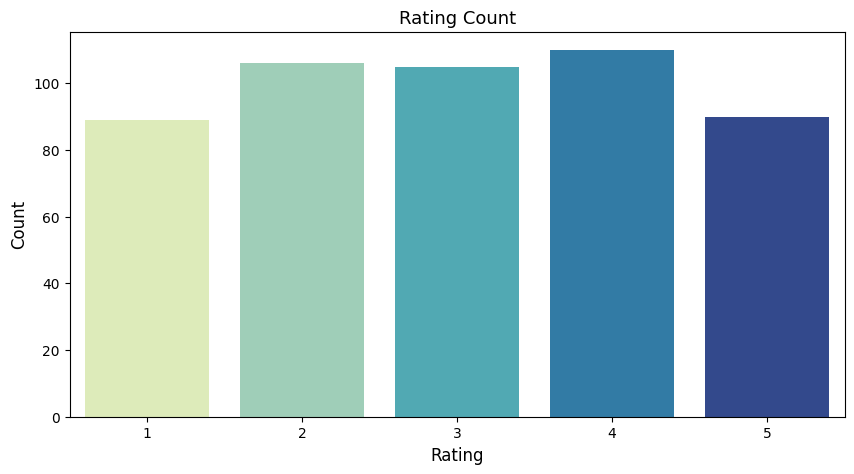

In [13]:
# ⭐ Frequency of Each Rating :

plt.figure(figsize = (10, 5))
sns.countplot(data = d, x = "rating", palette = "YlGnBu")
plt.title("Rating Count", fontsize = 13)
plt.xlabel("Rating", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.show()

***📌 Ratings of 4 stars are the most frequent, with approximately morethan 100 recorded.***

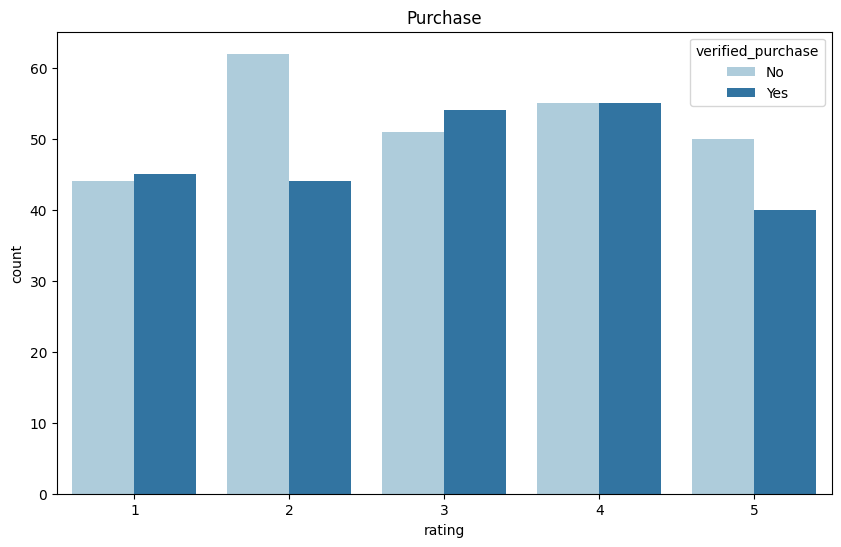

In [14]:
# ✅ Verified Purchase per Rating

plt.figure(figsize = (10, 6))
sns.countplot(data = d, x = "rating", hue = "verified_purchase", palette = "Paired")
plt.title("Purchase")
plt.show()

***📌 Overall, ratings are mixed — some categories (like 2 and 5 stars) are mostly from non‑verified purchases, while 3 stars lean toward verified purchases, and 4 stars are evenly split.***

***📌 Amazon and Flipkart show consistently high satisfaction, while the Website is mixed and mobile apps face polarized ratings with notable usability issues***.

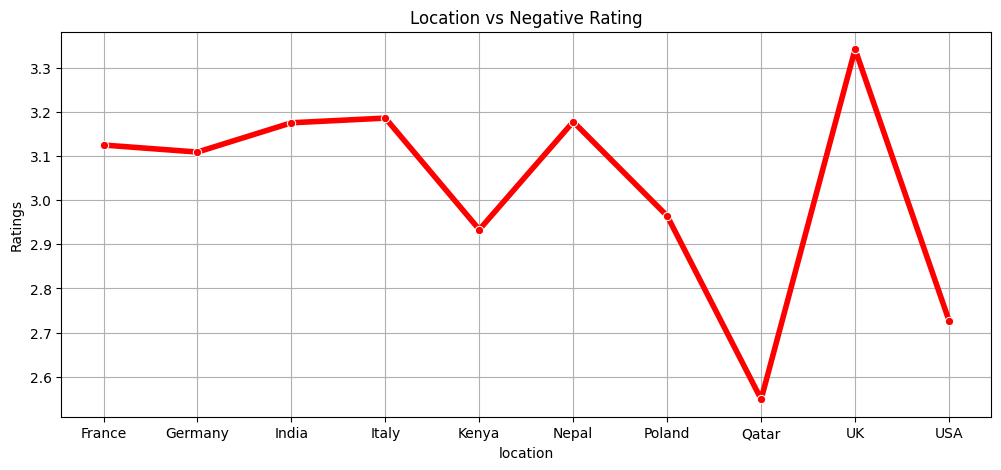

In [15]:
# Location vs Negative Rating :

neg_ratings = d.groupby("location")["rating"].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=neg_ratings,x="location",y="rating",marker = "o", color = "red", linewidth = 4)
plt.xlabel("location")
plt.ylabel("Ratings")
plt.title("Location vs Negative Rating")
plt.grid(True)
plt.show()

***📌 Negative ratings are lowest in Qatar and highest in the UK, with other countries showing moderate variation in between.***

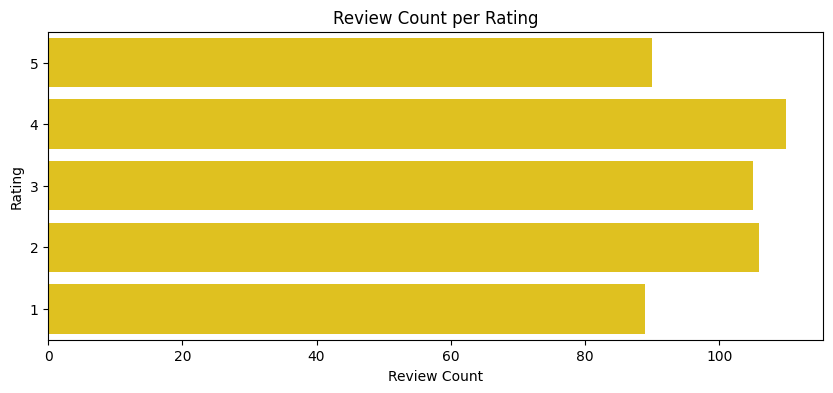

In [16]:
#1. Review Rating Distribution

# Review count per Rating
review_count = data.groupby("rating")["review"].count().reset_index(name = "review_count")

# Sorting Rating Order
rating_order = [5, 4, 3, 2, 1]

#Plot
plt.figure(figsize=(10, 4))
sns.barplot(
    data=review_count,
    x="review_count",
    y="rating",
    color="gold",
    orient="h",
    order=rating_order
)
plt.title("Review Count per Rating")
plt.xlabel("Review Count")
plt.ylabel("Rating")
plt.show()

***📌 The distribution of review ratings shows that most reviews fall in the middle range (ratings 2–4), while extreme ratings (1 and 5) are much less frequent***

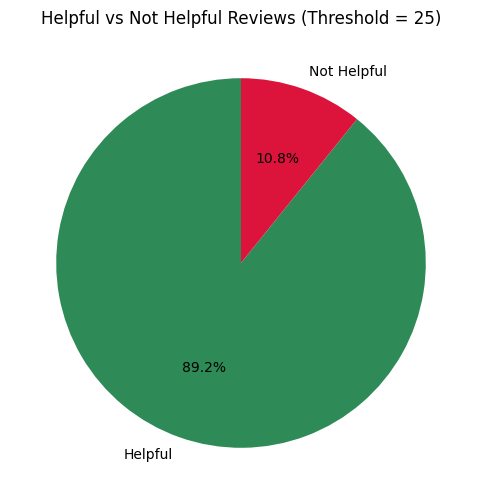

In [17]:
#2. Helpful Reviews

# Define threshold for Helpful reviews
threshold = 25

#Label reviews as Heplful & Not Heplful
data["feedback"] = data["helpful_votes"].apply(lambda x : "Helpful" if x >= threshold else "Not Helpful" )

#Count Reviews in each category
feedback_count = data.groupby("feedback").size().reset_index(name="Count")

#Plot
plt.figure(figsize=(6,6))
plt.pie(
    feedback_count["Count"],
    labels=feedback_count["feedback"],
    autopct="%1.1f%%",
    colors=["seagreen","crimson"],
    startangle=90
)
plt.title("Helpful vs Not Helpful Reviews (Threshold = 25)")
plt.show()


***📌  Most reviews are considered helpful***

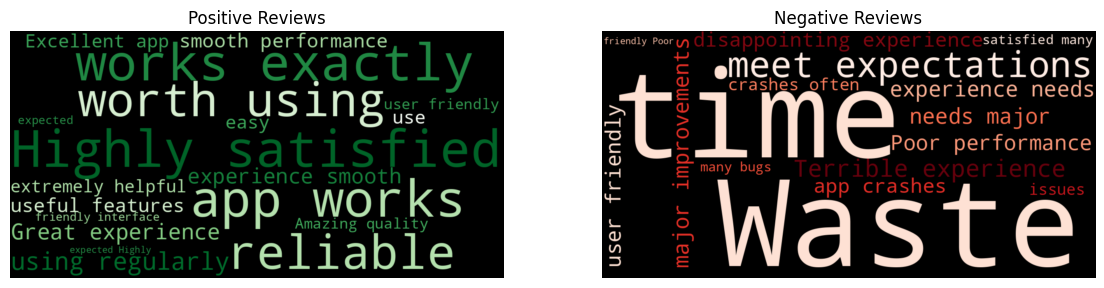

In [18]:
#3. Positive reviews Vs Negative reviews
from wordcloud import WordCloud

# Positive Texts
positive_reviews = data[data["rating"] >= 4]["review"]
positive_text = " ".join(positive_reviews)

# Negative Texts
negative_reviews = data[data["rating"] <= 2]["review"]
negative_text = " ".join(negative_reviews)

#Plot
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
wc_pos = WordCloud(width=1200, height=600, background_color="black", colormap="Greens").generate(positive_text)
plt.imshow(wc_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive Reviews")

plt.subplot(1,2,2)
wc_neg = WordCloud(width=1200, height=600, background_color="black", colormap="Reds").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews")
plt.show()

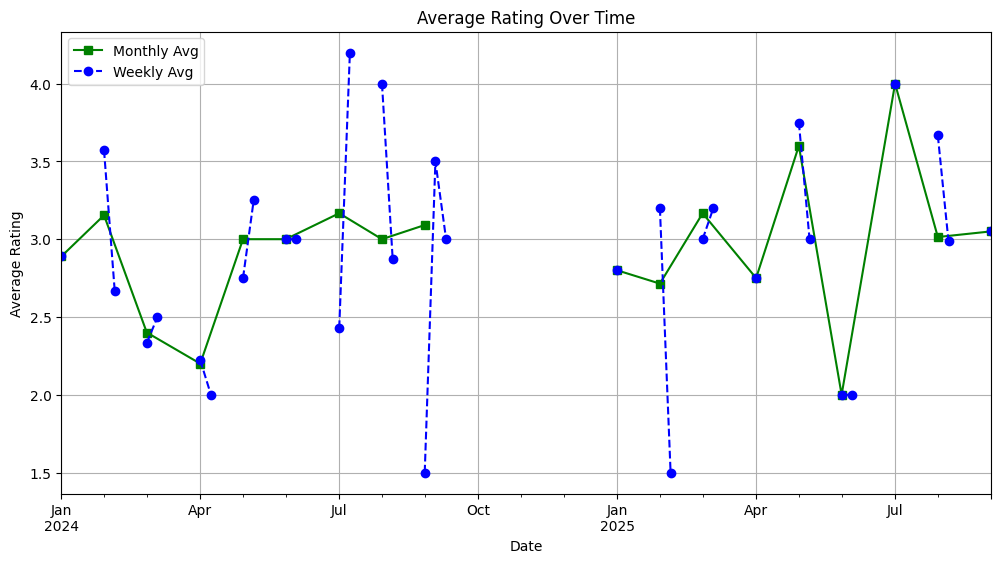

In [19]:
# 4. Average per rating

# Clean and Convert Dates
data["date"] = data["date"].replace("########", np.nan)
data["date"] = pd.to_datetime(data["date"], errors="coerce", dayfirst=True)

#Fill Missing Dates Within Each Versions
data = data.sort_values(["version","date"])
data["date_filled"] = data.groupby("version")["date"].transform(lambda x: x.ffill().bfill())

# Average Ratings per date, Week and Month
avg_rating = data.groupby("date_filled")["rating"].mean()
monthly_avg = data.set_index("date_filled").resample("M")["rating"].mean()
weekly_avg = data.set_index("date_filled").resample("W")["rating"].mean()

#Plot
plt.figure(figsize=(12,6))
monthly_avg.plot(marker="s", linestyle="-", color="green", label="Monthly Avg")
weekly_avg.plot(marker="o", linestyle="--", color="blue", label="Weekly Avg")
plt.title("Average Rating Over Time")
plt.xlabel("Date")
plt.ylabel("Average Rating")
plt.legend()
plt.grid(True)
plt.show()

<Figure size 1200x600 with 0 Axes>

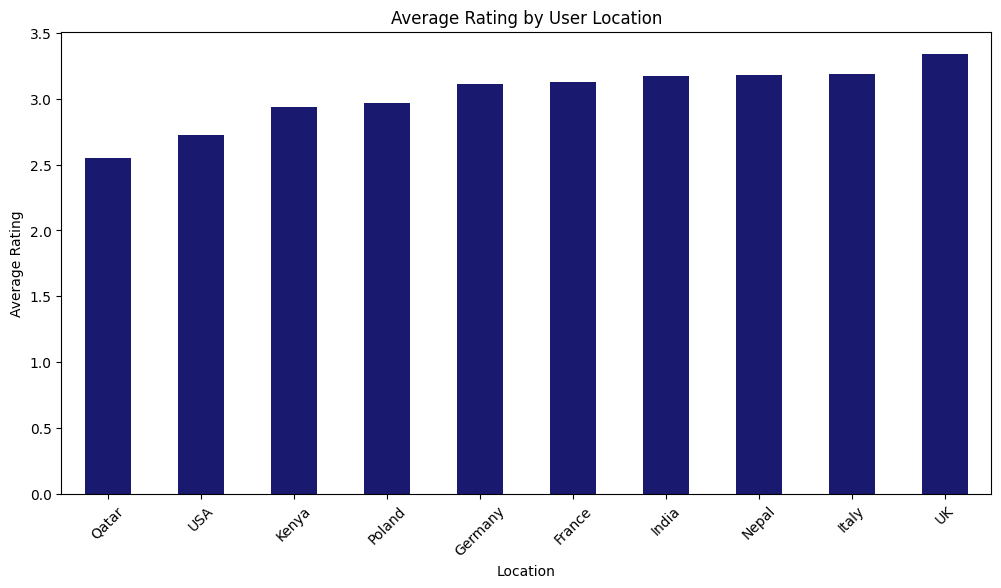

In [20]:
#5. Ratings per location

# Average rating per loaction
ratings_per_location = data.groupby("location")["rating"].mean().sort_values()

#plot
plt.figure(figsize = (12,6))
plt.figure(figsize=(12,6))
ratings_per_location.plot(kind="bar", color="midnightblue")
plt.title("Average Rating by User Location")
plt.xlabel("Location")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.show()


***📌 Users from the UK gave the highest average ratings, while those from Qatar gave the lowest, highlighting clear geographic differences in satisfaction***

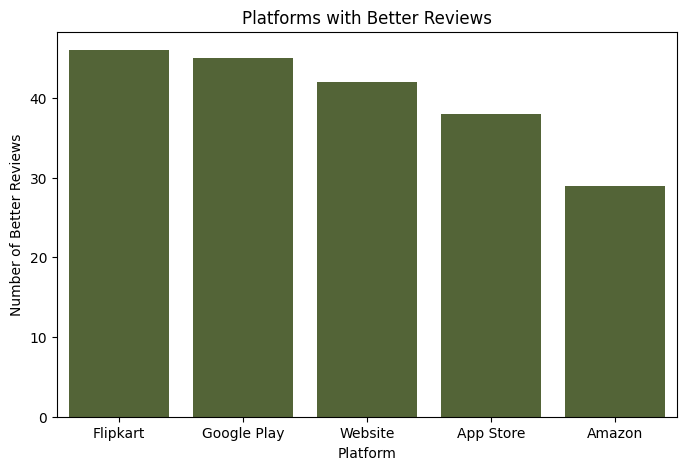

In [21]:
# 6. Better reviews per plotform

better_reviews = data[data["rating"] > 3]

# Count reviews per platform
platform_counts = better_reviews["platform"].value_counts().reset_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=platform_counts, x="platform", y="count", color="darkolivegreen")
plt.title("Platforms with Better Reviews")
plt.xlabel("Platform")
plt.ylabel("Number of Better Reviews")
plt.show()


***📌 Flipkart leads with the highest number of better reviews, followed by Google Play, while Amazon has the lowest***

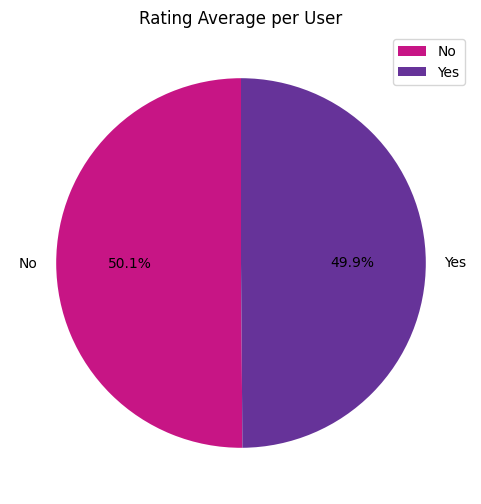

In [22]:
# 7. Verified Vs Non Verfied users

# rating Average per users
rating_per_user = data.groupby("verified_purchase")["rating"].mean().reset_index(name = "Average Rating")

#Plot
plt.figure(figsize = (6,6))
plt.pie( rating_per_user["Average Rating"], labels=rating_per_user["verified_purchase"], autopct = "%1.1f%%", colors = ["mediumvioletred", "rebeccapurple"], startangle = 90 )
plt.title("Rating Average per User")
plt.legend()
plt.show()


***📌 The chart shows that verified and non‑verified users give ratings at almost the same average level.***

<Axes: xlabel='rating', ylabel='review_length'>

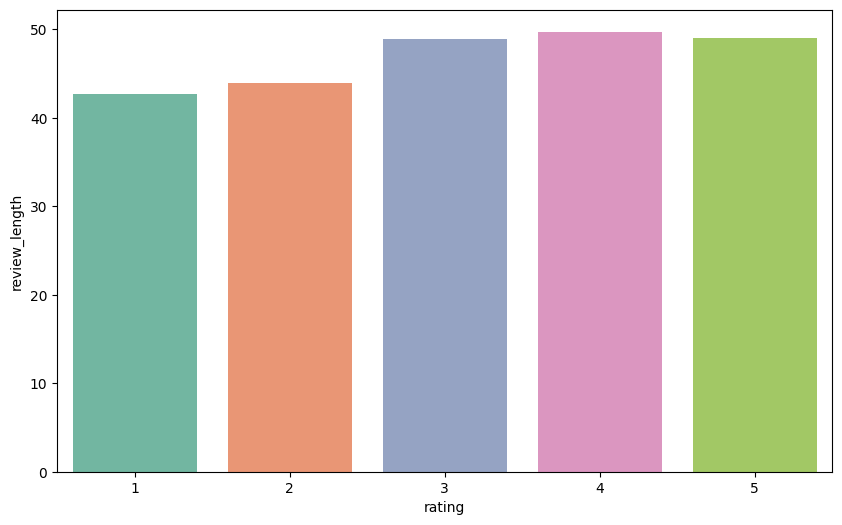

In [23]:
#8. Length of reviews per rating

# Length per rating
data["review_length"] = data["review"].str.len()
avg_length_per_rating = data.groupby("rating")["review_length"].mean().reset_index()

#Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=avg_length_per_rating,
    x="rating",
    y="review_length",
    palette="Set2"
)

***📌 Higher ratings (4–5) tend to have longer reviews, while lower ratings (1–2) are shorter***

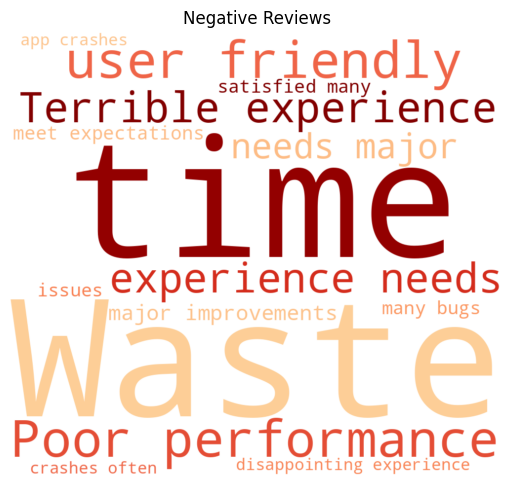

In [24]:
# 9. Most mentioned word in 1 star review

# Negative Texts
negative_reviews = data[data["rating"] == 1]["review"]
negative_text = " ".join(negative_reviews.tolist())

#Plot
plt.figure(figsize = (14,7))
plt.subplot(1,2,2)
wc_neg = WordCloud(width=1000, height=900, background_color="white", colormap="OrRd").generate(negative_text)
plt.imshow(wc_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative Reviews")
plt.show()

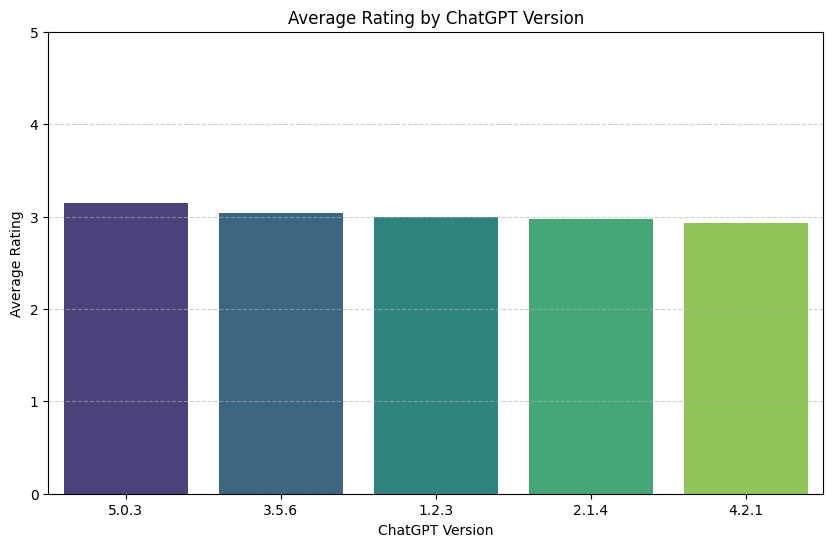

In [25]:
# 10. Highest average version

# Group by version and calculate average rating
avg_rating_by_version = data.groupby("version")["rating"].mean().reset_index().sort_values(by = "rating", ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(data=avg_rating_by_version, x="version", y="rating", palette="viridis")
plt.title("Average Rating by ChatGPT Version")
plt.xlabel("ChatGPT Version")
plt.ylabel("Average Rating")
plt.ylim(0, 5)
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.show()


***📌 Average ratings steadily declined across ChatGPT versions, with 5.0.3 rated highest and 4.2.1 lowest***

In [26]:
# Selectiong required feautures for Preprocessing :

d = d[["review", "rating"]]

In [27]:
d

,review,rating
0,"Not satisfied, many bugs and issues.",1
1,Amazing quality and user-friendly interface.,5
2,"Terrible experience, needs major improvements.",2
3,Poor performance and not user-friendly.,1
4,"Not satisfied, many bugs and issues.",2
...,...,...
495,"Waste of time, does not meet expectations.",2
496,"Great experience, smooth performance and usefu...",5
497,"Terrible experience, needs major improvements.",2
498,"Highly satisfied, the app works exactly as exp...",4


# ***TEXT PREPROCESSING***

***1. LOWERCASING 🔡***

In [28]:
text = d[["review"]].copy()
text["review"]=(text["review"].str.lower().str.replace(r"\s+"," ", regex=True).str.strip())
text.head(5)

,review
0,"not satisfied, many bugs and issues."
1,amazing quality and user-friendly interface.
2,"terrible experience, needs major improvements."
3,poor performance and not user-friendly.
4,"not satisfied, many bugs and issues."


***2. WHITE SPACE REMOVAL ✅***

In [29]:
def remove_whitespace(text):
  return " ".join(text.split())

text["review"] = text["review"].apply(remove_whitespace)
text.head(5)

,review
0,"not satisfied, many bugs and issues."
1,amazing quality and user-friendly interface.
2,"terrible experience, needs major improvements."
3,poor performance and not user-friendly.
4,"not satisfied, many bugs and issues."


***3. TOKENIZATION ⛓️‍💥***

In [30]:
import nltk
from nltk import word_tokenize
nltk.download('punkt')
nltk.download('punkt_tab')

text["review"] = text["review"].apply(word_tokenize)
text.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


,review
0,"[not, satisfied, ,, many, bugs, and, issues, .]"
1,"[amazing, quality, and, user-friendly, interfa..."
2,"[terrible, experience, ,, needs, major, improv..."
3,"[poor, performance, and, not, user-friendly, .]"
4,"[not, satisfied, ,, many, bugs, and, issues, .]"


***4. SPELLCHECKING 🔍***

In [31]:
!pip install pyspellchecker
from spellchecker import SpellChecker

spell = SpellChecker()

def correct_spelling(tokens):
    return [spell.correction(w) or w for w in tokens]

text["review"] = text["review"].apply(correct_spelling)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 43.1 MB/s eta 0:00:00


***5. STOPWORDS REMOVAL 🚫***

In [32]:
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words("english"))

stop_words = stop_words - {"not", "no", "nor"}

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

text["review"] = text["review"].apply(remove_stopwords)
text.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,review
0,"[not, satisfied, ,, many, bugs, issues, .]"
1,"[amazing, quality, user-friendly, interface, .]"
2,"[terrible, experience, ,, needs, major, improv..."
3,"[poor, performance, not, user-friendly, .]"
4,"[not, satisfied, ,, many, bugs, issues, .]"


***6. PUNCTUATION REMOVAL ⁉️***

In [33]:
def remove_punct(tokens):
    return [w for w in tokens if w.isalnum()]

text["review"] = text["review"].apply(remove_punct)

***7. LEMMATIZATION***

In [34]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
   return [lemmatizer.lemmatize(w) for w in tokens]

text["review"] = text["review"].apply(lemmatize_tokens)

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [35]:
d["review"] = text["review"]

# ***SENTIMENT ANALYSIS***

***SENTIMENT CLASSIFICATION***

In [36]:
def rating_to_sentiment(r):
    if r in [1, 2]:
        return "negative"
    elif r == 3:
        return "neutral"
    else:
        return "positive"

d["sentiment"] = d["rating"].apply(rating_to_sentiment)

In [37]:
d["review"] = d["review"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)

***FEATURE - TARGET SPLIT***

In [38]:
X = d.drop("sentiment", axis = 1)
y = d["sentiment"]

***TRAIN - TEST SPLIT***

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=24,
    stratify=y

)

***ENCODING***

In [40]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

***TF - IDF VECTORIZATION***

In [41]:
# from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf = TfidfVectorizer(max_features=5000)

# X_train_text = tfidf.fit_transform(X_train["review"])
# X_test_text = tfidf.transform(X_test["review"])

# ***MACHINE LEARNING - MODEL BUILDING***

***1. LOGISTIC REGRESSION - MULTICLASS CLASSIFICATION***

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Model Building
LR = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000)),
    ("lr", LogisticRegression(
        random_state=101,
        max_iter=200,
        multi_class="multinomial",
        C=0.6,
        class_weight="balanced"
    ))
])

# Model Training
LR.fit(X_train["review"], y_train_enc)

# Model Prediction
y_pred = LR.predict(X_test["review"])

# Evaluation Metrics:
print("Classification Report :")
print("")
print(classification_report(y_test_enc, y_pred))

print("Performance Metrics Score :")
print()
print("Training Accuracy : ", round(LR.score(X_train["review"], y_train_enc), 2))
print("Testing Accuracy  : ", round(LR.score(X_test["review"], y_test_enc), 2))
print()

print("Accuracy Score    : ", round(accuracy_score(y_test_enc, y_pred), 2))
print("Precision Score   : ", round(precision_score(y_test_enc, y_pred, average="weighted"), 2))
print("Recall Score      : ", round(recall_score(y_test_enc, y_pred, average="weighted"), 2))
print("F1 Score          : ", round(f1_score(y_test_enc, y_pred, average="weighted"), 2))


Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        50

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Performance Metrics Score :

Training Accuracy :  1.0
Testing Accuracy  :  1.0

Accuracy Score    :  1.0
Precision Score   :  1.0
Recall Score      :  1.0
F1 Score          :  1.0


***2. RANDOMFOREST CLASSIFIER:***

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Model Building:
RFC = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("RFC", RandomForestClassifier(
        n_estimators=200,
        max_depth=None,
        min_samples_split=3,
        random_state=150,
        class_weight="balanced",
        n_jobs=-1
    ))
])

# Model Training:
RFC.fit(X_train["review"], y_train_enc)

# Model Prediction:
RFC_y_pred = RFC.predict(X_test["review"])

# Evaluation Metrics:
print("Classification Report :")
print("")
print(classification_report(y_test_enc, RFC_y_pred))

print("Performance Metrics Score :")
print(" ")
print("Training Accuracy : ", round(RFC.score(X_train["review"], y_train_enc), 2))
print("Testing Accuracy  : ", round(RFC.score(X_test["review"], y_test_enc), 2))
print(" ")
print("Accuracy Score    : ", round(accuracy_score(y_test_enc, RFC_y_pred), 2))
print("Precision Score   : ", round(precision_score(y_test_enc, RFC_y_pred, average="weighted"), 2))
print("Recall Score      : ", round(recall_score(y_test_enc, RFC_y_pred, average="weighted"), 2))
print("F1 Score          : ", round(f1_score(y_test_enc, RFC_y_pred, average="weighted"), 2))

Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        50

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Performance Metrics Score :
 
Training Accuracy :  1.0
Testing Accuracy  :  1.0
 
Accuracy Score    :  1.0
Precision Score   :  1.0
Recall Score      :  1.0
F1 Score          :  1.0


***3. NAIVE BAYES MODEL***

In [44]:
from sklearn.naive_bayes import MultinomialNB

# Model Building:
NB = Pipeline([
    ("tfidf", TfidfVectorizer(max_features=5000, ngram_range=(1,2))),
    ("nb" , MultinomialNB())
])

# Model Training:
NB.fit(X_train["review"], y_train_enc)

# Model Prediction:
NB_y_pred = NB.predict(X_test["review"])

# Evaluation Matrix:
print("Classification Report :")
print()
print(classification_report(y_test_enc, NB_y_pred))

print("Performance Metrics Score :")
print()
print("Training Accuracy : ", round(NB.score(X_train["review"], y_train_enc), 2))
print("Testing Accuracy  : ", round(NB.score(X_test["review"], y_test_enc), 2))
print(" ")
print("Accuracy Score    : ", round(accuracy_score(y_test_enc, NB_y_pred), 2))
print("Precision Score   : ", round(precision_score(y_test_enc, NB_y_pred, average="weighted"), 2))
print("Recall Score      : ", round(recall_score(y_test_enc, NB_y_pred, average="weighted"), 2))
print("F1 Score          : ", round(f1_score(y_test_enc, NB_y_pred, average="weighted"), 2))


Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        50

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Performance Metrics Score :

Training Accuracy :  1.0
Testing Accuracy  :  1.0
 
Accuracy Score    :  1.0
Precision Score   :  1.0
Recall Score      :  1.0
F1 Score          :  1.0


# ***DEEP LEARNING***


In [45]:
# IMPORTING REQUIRED LIBRARIES

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight


***FEATURE - TARGET & TRAIN - TEST SPLIT***

In [46]:
X_dl = d["review"].astype(str)
y_dl = d["sentiment"]

x_train, x_test, y_train, y_test = train_test_split(
    X_dl,
    y_dl,
    test_size=0.25,
    random_state=24,
    stratify=y_dl

)

***ENCODING***

In [47]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_trai_enc = le.fit_transform(y_train)
y_test_enc  = le.transform(y_test)

***1. TOKENIZATION :***

In [48]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(x_train)

X_train_seq = tokenizer.texts_to_sequences(x_train)
X_test_seq  = tokenizer.texts_to_sequences(x_test)

***2. PADDING SEQUENCES :***

In [49]:
max_len = 300

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_len)

print(X_train_pad.shape)

(375, 300)


# ***MODEL BUILDING***

 ***1. LSTMs :***

In [51]:
model = Sequential()

# Embedding Layer:
model.add(Embedding(input_dim=5000, output_dim=128, input_length=max_len))

# LSTM Layer:
model.add(LSTM(64, return_sequences=False))

# Dropout (avoid overfitting):
model.add(Dropout(0.5))

# Output Layer:
model.add(Dense(3, activation="softmax"))

# Model Building:
num_classes = len(np.unique(y_train_enc))
model = Sequential([
    Embedding(input_dim=5000, output_dim=300, input_length=max_len, trainable = False),
    Bidirectional(LSTM(128, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])

#Compile model:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer=Adam(learning_rate=0.0005),
    metrics=["accuracy"]
)

# Handle imbalance:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_enc),
    y=y_train_enc
)
class_weight_dict = dict(enumerate(class_weights))
class_weight=class_weight_dict

# Train Model:
history = model.fit(
    X_train_pad,
    y_train_enc,
    validation_split=0.2,
    epochs=30,
    batch_size=64,
    class_weight=class_weight_dict,
    verbose=1
)

# Prediction:
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)

print("")
print("")

# Evaluation Metrics:
print("Classification Report :")
print("")
print(classification_report(y_test_enc, y_pred))

print("Performance Metrics Score : ")
print(" ")
print("Accuracy Score  : ", round(accuracy_score(y_test_enc, y_pred),2))
print("Precision Score : ", round(precision_score(y_test_enc, y_pred, average="weighted"),2))
print("Recall Score    : ", round(recall_score(y_test_enc, y_pred, average="weighted"),2))
print("F1 Score        : ", round(f1_score(y_test_enc, y_pred, average="weighted"),2))


Epoch 1/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.2984 - loss: 1.1025 - val_accuracy: 0.3067 - val_loss: 1.0964
Epoch 2/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 2s/step - accuracy: 0.4297 - loss: 1.0834 - val_accuracy: 0.3067 - val_loss: 1.0836
Epoch 3/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4402 - loss: 1.0674 - val_accuracy: 0.3067 - val_loss: 1.0811
Epoch 4/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 25s 3s/step - accuracy: 0.4798 - loss: 1.0760 - val_accuracy: 0.3067 - val_loss: 1.0715
Epoch 5/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - accuracy: 0.5759 - loss: 1.0519 - val_accuracy: 1.0000 - val_loss: 1.0579
Epoch 6/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6208 - loss: 1.0510 - val_accuracy: 0.7467 - val_loss: 1.0363
Epoch 7/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 13s 3s/step - accuracy: 0.6577 - loss: 1.0331 - val_accuracy: 0.3067 - val_loss: 1.0240
Epoch 8/30
5/5 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.5412 - loss: 0.9776 - val_accuracy: 0.7467 - val_loss: 0.9620
Epoch 9/

***2. BERT***

In [52]:
# !pip install -U transformers tensorflow
# !pip install torch transformers scikit-learn
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizerFast, BertForSequenceClassification
from torch.optim import AdamW

# Device / GPU:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

#Tokenization:
MODEL_NAME = "bert-base-uncased"
MAX_LEN = 128
BATCH_SIZE = 16

tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

X_train_enc = tokenizer(
    list(x_train),
    padding=True,
    truncation=True,
    max_length=MAX_LEN,
    return_tensors="pt"
)

X_test_enc = tokenizer(
    list(x_test),
    padding=True,
    truncation=True,
    max_length=MAX_LEN,
    return_tensors="pt"
)

# Dataset class:
class TextDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item["labels"] = self.labels[idx]
        return item

    def __len__(self):
        return len(self.labels)


train_dataset = TextDataset(X_train_enc, y_train_enc)
test_dataset  = TextDataset(X_test_enc, y_test_enc)

# Data Loaders:
train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=BATCH_SIZE)

# Model:
num_classes = len(np.unique(y_train_enc))

model = BertForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=num_classes
)

model.to(device)

# Optimizer + Class weight:
class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(y_train_enc),
    y=y_train_enc
)

class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

criterion = torch.nn.CrossEntropyLoss(weight=class_weights)
optimizer = AdamW(model.parameters(), lr=2e-5)

# Training:
EPOCHS = 3

model.train()
for epoch in range(EPOCHS):
    total_loss = 0

    for batch in train_loader:
        optimizer.zero_grad()

        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        loss = criterion(outputs.logits, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss:.4f}")

# Prediction:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)
        labels = batch["labels"].to(device)

        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask
        )

        preds = torch.argmax(outputs.logits, dim=1)

        y_pred.extend(preds.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

# Evaluation Metrics:
print("Classification Report :")
print("")
print(classification_report(y_true, y_pred))

print("Performance Metrics Score : ")
print(" ")
print("Accuracy Score  : ", round(accuracy_score(y_true, y_pred), 2))
print("Precision Score : ", round(precision_score(y_true, y_pred, average="weighted"), 2))
print("Recall Score    : ", round(recall_score(y_true, y_pred, average="weighted"), 2))
print("F1 Score        : ", round(f1_score(y_true, y_pred, average="weighted"), 2))


Using device: cpu


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/199 [00:00<?, ?it/s]

BertForSequenceClassification LOAD REPORT from: bert-base-uncased
Key                                        | Status     | 
-------------------------------------------+------------+-
cls.predictions.transform.LayerNorm.weight | UNEXPECTED | 
cls.seq_relationship.weight                | UNEXPECTED | 
cls.seq_relationship.bias                  | UNEXPECTED | 
cls.predictions.transform.dense.bias       | UNEXPECTED | 
cls.predictions.transform.dense.weight     | UNEXPECTED | 
cls.predictions.bias                       | UNEXPECTED | 
cls.predictions.transform.LayerNorm.bias   | UNEXPECTED | 
classifier.bias                            | MISSING    | 
classifier.weight                          | MISSING    | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.
- MISSING	:those params were newly initialized because missing from the checkpoint. Consider training on your downstream task.


Epoch 1/3 - Loss: 16.5793
Epoch 2/3 - Loss: 4.3011
Epoch 3/3 - Loss: 1.1336
Classification Report :

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        50

    accuracy                           1.00       125
   macro avg       1.00      1.00      1.00       125
weighted avg       1.00      1.00      1.00       125

Performance Metrics Score : 
 
Accuracy Score  :  1.0
Precision Score :  1.0
Recall Score    :  1.0
F1 Score        :  1.0


# ***SAVING MODEL***

In [53]:
import joblib

joblib.dump(LR, "lr_sentiment_pipeline.pkl")
joblib.dump(NB, "nb_sentiment_pipeline.pkl")

['nb_sentiment_pipeline.pkl']

In [54]:
d.to_csv("reviews_with_sentiment.csv", index=False)